In [85]:
import pandas as pd
import numpy as np
import pydotplus
import matplotlib.pyplot as  plt
import seaborn as sns
import  matplotlib.image as mping
from sklearn.model_selection import train_test_split
from io import StringIO
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import warnings
warnings.filterwarnings('ignore')


In [29]:
df = pd.read_csv("Company_Data.csv")

In [30]:
df1 = df.copy()

In [31]:
df1.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No

In [32]:
df1.describe()

Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10.000000   
25%      5.390000  115.000000   42.750000     0.000000  139.000000   
50%      7.490000  125.000000   69.000000     5.000000  272.000000   
75%      9.320000  135.000000   91.000000    12.000000  398.500000   
max     16.270000  175.000000  120.000000    29.000000  509.000000   

            Price         Age   Education  
count  400.000000  400.000000  400.000000  
mean   115.795000   53.322500   13.900000  
std     23.676664   16.200297    2.620528  
min     24.000000   25.000000   10.000000  
25%    100.000000   39.750000   12.000000  
50%    117.000000   54.500000   14.000000  
75%    131.000000   66.000000   16.000000  
max    191.000000   80.000000   18.000000

In [33]:
df1.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [34]:
df1.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [35]:
df1.shape

(400, 11)

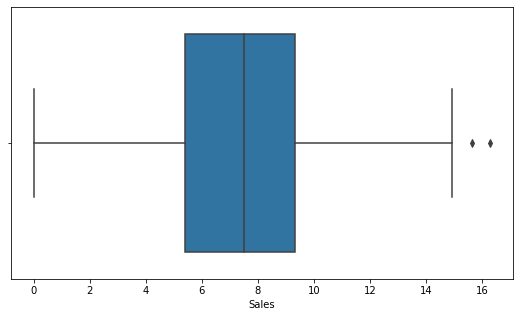

In [36]:
# Outlier check
ax = sns.boxplot(df1['Sales'])

In [37]:
# The data has 2 outlier instance.

In [38]:
plt.rcParams["figure.figsize"] = 9,5

Skew:0.18556036318721578
Kurtosis:-0.08087736743346197


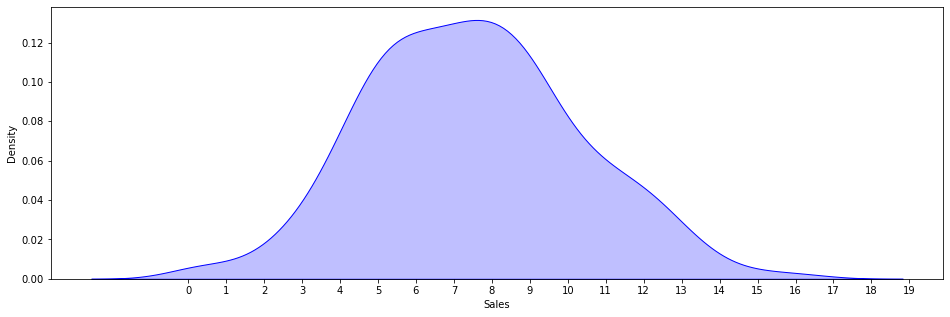

In [39]:
plt.figure(figsize=(16,5))
print("Skew:{}".format(df1['Sales'].skew()))
print("Kurtosis:{}".format(df1['Sales'].kurtosis()))
ax = sns.kdeplot(df1['Sales'],shade=True,color='b')
plt.xticks([i for i in range(0,20,1)])
plt.show()

In [40]:
# The data is skewed in right
# The data has negative kurtosis

In [41]:
obj_column = df1.select_dtypes(include='object').columns.tolist()

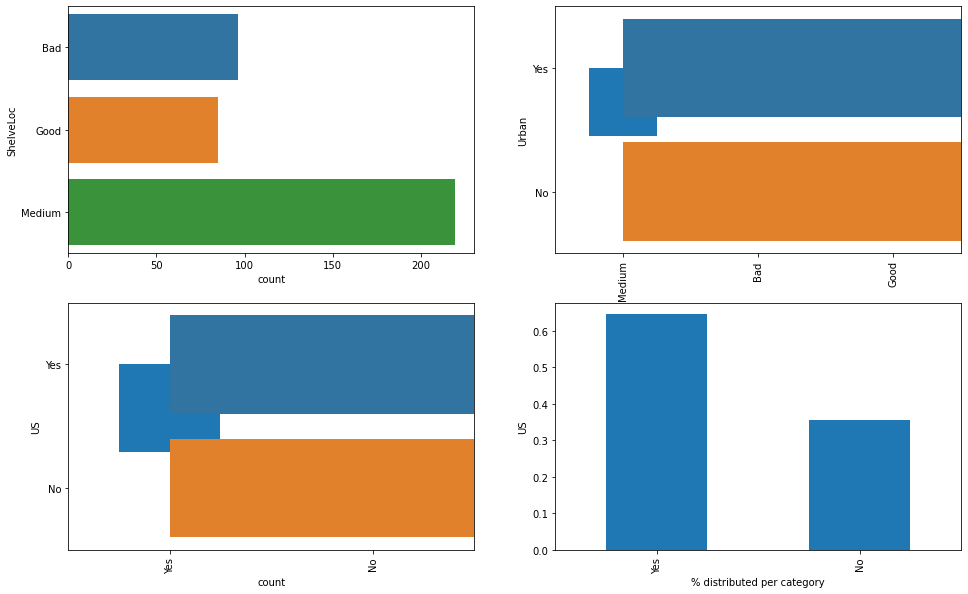

In [42]:
plt.figure(figsize=(16,10))
for i,col in enumerate(obj_column,1):
    plt.subplot(2,2,i)
    sns.countplot(data=df1,y=col)
    plt.subplot(2,2,i+1)
    df1[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distributed per category')
plt.tight_layout
plt.show()
    

In [43]:
num_columns = df1.select_dtypes(exclude='object').columns.tolist()

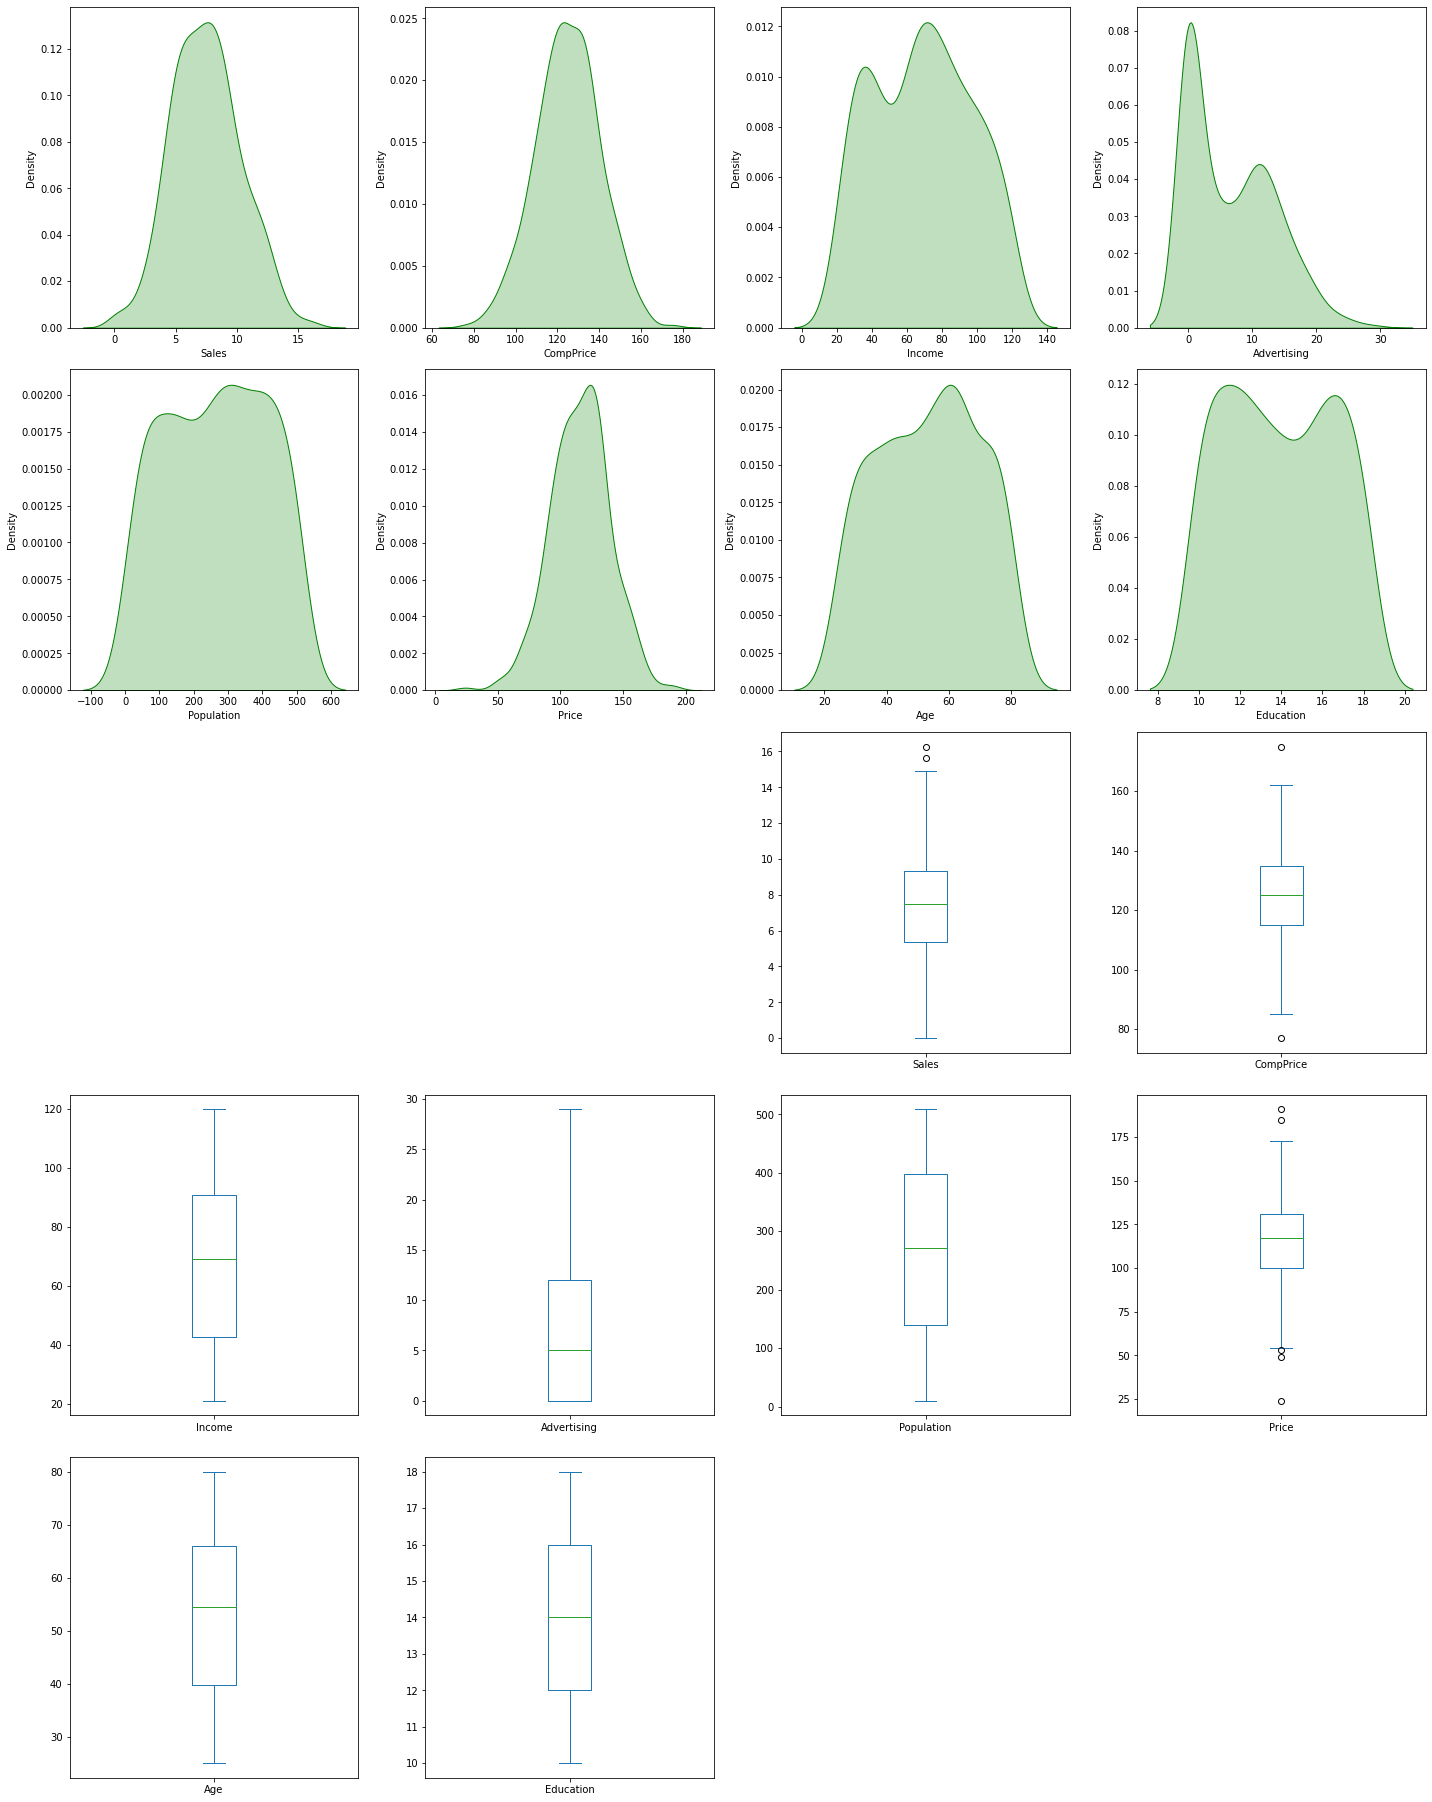

Sales  CompPrice    Income  Advertising  Population     Price  \
skewness  0.185560  -0.042755  0.049444     0.639586   -0.051227 -0.125286   
kurtosis -0.080877   0.041666 -1.085289    -0.545118   -1.202318  0.451885   

               Age  Education  
skewness -0.077182   0.044007  
kurtosis -1.134392  -1.298332

In [44]:
plt.figure(figsize=(20,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    df[col].plot.box()
plt.tight_layout()
plt.show()
num_data = df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

In [45]:
corr = df1.corr()

In [46]:
df1 = pd.get_dummies(df1,columns = ['ShelveLoc','Urban','US'])

In [47]:
corr = df1.corr()

<AxesSubplot:>

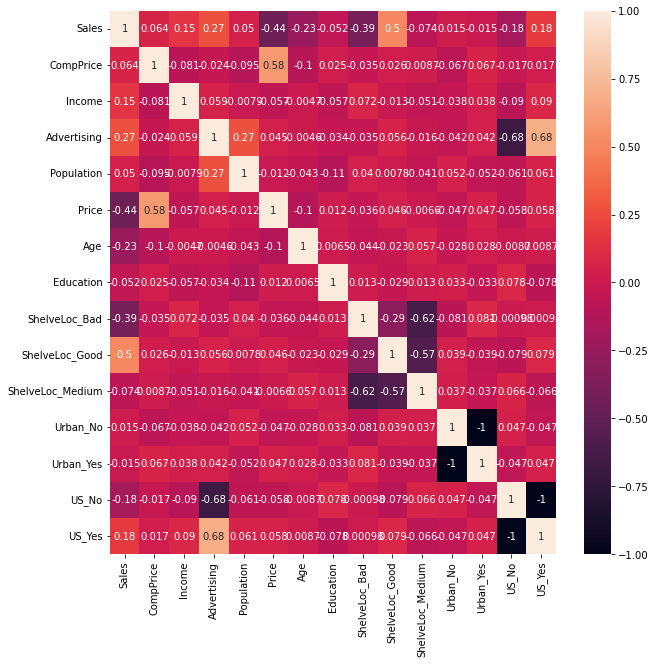

In [48]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

# **Decision Tree Model**

**Since the Target variable is cntinuous ,we can create a class of the value based onn the mean.**

**<=7.49 =="Small" and >7.49 == "large"**

In [49]:
df1["sales"]="small"
df1.loc[df1["Sales"]>7.49,"sales"]="large"
df1.drop(["Sales"],axis=1,inplace=True)

In [50]:
X = df1.iloc[:,0:14]
Y = df1.iloc[:,14]

In [54]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,stratify=Y)

In [55]:
model = DT(criterion='entropy')
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [56]:
pred_train =model.predict(x_train)

In [57]:
accuracy_score(y_train,pred_train)

1.0

In [58]:
confusion_matrix(y_train,pred_train)

array([[159,   0],
       [  0, 161]], dtype=int64)

In [59]:
pred_test = model.predict(x_test)

In [60]:
accuracy_score(y_test,pred_test)

0.6875

In [63]:
confusion_matrix(y_test,pred_test)

array([[26, 14],
       [11, 29]], dtype=int64)

In [64]:
df_t = pd.DataFrame({'Actual':y_test,'Predicted':pred_test})


In [65]:
df_t

Actual Predicted
382  small     large
268  small     small
26   large     large
388  large     large
294  large     large
..     ...       ...
323  large     large
376  large     large
47   small     small
339  large     large
115  large     small

[80 rows x 2 columns]

In [66]:
cols = list(df1.columns)

In [67]:
predictors = cols[0:14]
target = cols[14]

In [72]:
dot_data = StringIO()

In [73]:
export_graphviz(model,out_file = dot_data, filled =True, rounded = True, feature_names =predictors,class_names = target, impurity = False )

In [82]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [88]:
import os
os.environ["PATH"] += os.pathsep + r'D:\Excelr_assignments\Decision tree\Graphviz\bin'

In [89]:
graph.write_png("company_full.png")

True

## Conclusion

**Since the accuracy of the training set is 100% we test the accuracy on the test data which is 70%
AS seen in the confusion matrix of the data 56 instances were predicted correctly 24 instances were not predicted correctly.**

In [92]:
img = mping.imread('company_full.png')

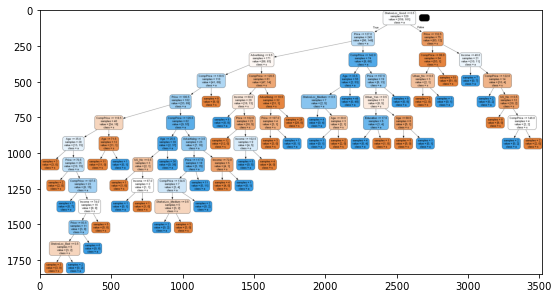

In [93]:
plt.imshow(img)

In [94]:
model.feature_importances_

array([0.19658616, 0.13206347, 0.084195  , 0.        , 0.29552905,
       0.09444986, 0.01128044, 0.01517153, 0.11173434, 0.02544356,
       0.00860927, 0.01070204, 0.01423527, 0.        ])

In [97]:
fi = pd.DataFrame({'feature':list(x_train.columns),'importance':model.feature_importances_}).sort_values('importance',ascending=False)

In [98]:
fi

feature  importance
4              Price    0.295529
0          CompPrice    0.196586
1             Income    0.132063
8     ShelveLoc_Good    0.111734
5                Age    0.094450
2        Advertising    0.084195
9   ShelveLoc_Medium    0.025444
7      ShelveLoc_Bad    0.015172
12             US_No    0.014235
6          Education    0.011280
11         Urban_Yes    0.010702
10          Urban_No    0.008609
3         Population    0.000000
13            US_Yes    0.000000

## As seen in the above table,Price is the most important feature.